## 미세먼지 + 기온데이터

In [ ]:
import pandas as pd
from tabulate import tabulate

미세먼지 데이터 확인

In [ ]:
# PM10 : 미세먼지, PM2.5 : 초미세먼지

dust=pd.read_excel('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_31/dust.xlsx')

print(dust.head())
print(tabulate(dust.head(), headers='keys',tablefmt='pretty'))

              날짜   아황산가스  일산화탄소      오존   이산화질소  PM10  PM2.5
0  2023-12-01 01  0.0029   0.31  0.0296  0.0114  18.0    9.0
1  2023-12-01 02  0.0026   0.33  0.0314  0.0089  17.0    8.0
2  2023-12-01 03  0.0026   0.34  0.0298  0.0096  20.0    9.0
3  2023-12-01 04  0.0024   0.34  0.0265  0.0125  18.0    9.0
4  2023-12-01 05  0.0023   0.33  0.0270  0.0126  19.0   10.0
+---+---------------+------------+------------+--------+------------+------+-------+
|   |     날짜      | 아황산가스 | 일산화탄소 |  오존  | 이산화질소 | PM10 | PM2.5 |
+---+---------------+------------+------------+--------+------------+------+-------+
| 0 | 2023-12-01 01 |   0.0029   |    0.31    | 0.0296 |   0.0114   | 18.0 |  9.0  |
| 1 | 2023-12-01 02 |   0.0026   |    0.33    | 0.0314 |   0.0089   | 17.0 |  8.0  |
| 2 | 2023-12-01 03 |   0.0026   |    0.34    | 0.0298 |   0.0096   | 20.0 |  9.0  |
| 3 | 2023-12-01 04 |   0.0024   |    0.34    | 0.0265 |   0.0125   | 18.0 |  9.0  |
| 4 | 2023-12-01 05 |   0.0023   |    0.33    | 0.027  |  

In [ ]:
print(dust.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      744 non-null    object 
 1   아황산가스   740 non-null    float64
 2   일산화탄소   740 non-null    float64
 3   오존      740 non-null    float64
 4   이산화질소   740 non-null    float64
 5   PM10    737 non-null    float64
 6   PM2.5   740 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.8+ KB
None


In [ ]:
dust.rename(columns={'날짜':'date','아황산가스':'so2','일산화탄소':'co','오존':'o3','이산화질소':'no2'}, inplace=True)

print(tabulate(dust.head(), headers='keys',tablefmt='psql'))

+----+---------------+--------+------+--------+--------+--------+---------+
|    | date          |    so2 |   co |     o3 |    no2 |   PM10 |   PM2.5 |
|----+---------------+--------+------+--------+--------+--------+---------|
|  0 | 2023-12-01 01 | 0.0029 | 0.31 | 0.0296 | 0.0114 |     18 |       9 |
|  1 | 2023-12-01 02 | 0.0026 | 0.33 | 0.0314 | 0.0089 |     17 |       8 |
|  2 | 2023-12-01 03 | 0.0026 | 0.34 | 0.0298 | 0.0096 |     20 |       9 |
|  3 | 2023-12-01 04 | 0.0024 | 0.34 | 0.0265 | 0.0125 |     18 |       9 |
|  4 | 2023-12-01 05 | 0.0023 | 0.33 | 0.027  | 0.0126 |     19 |      10 |
+----+---------------+--------+------+--------+--------+--------+---------+


In [ ]:
dust['date']=dust['date'].str[:10]
print(tabulate(dust.head(), headers='keys',tablefmt='psql'))

+----+------------+--------+------+--------+--------+--------+---------+
|    | date       |    so2 |   co |     o3 |    no2 |   PM10 |   PM2.5 |
|----+------------+--------+------+--------+--------+--------+---------|
|  0 | 2023-12-01 | 0.0029 | 0.31 | 0.0296 | 0.0114 |     18 |       9 |
|  1 | 2023-12-01 | 0.0026 | 0.33 | 0.0314 | 0.0089 |     17 |       8 |
|  2 | 2023-12-01 | 0.0026 | 0.34 | 0.0298 | 0.0096 |     20 |       9 |
|  3 | 2023-12-01 | 0.0024 | 0.34 | 0.0265 | 0.0125 |     18 |       9 |
|  4 | 2023-12-01 | 0.0023 | 0.33 | 0.027  | 0.0126 |     19 |      10 |
+----+------------+--------+------+--------+--------+--------+---------+


In [ ]:
dust['date']=pd.to_datetime(dust['date'])
print(dust.dtypes)

date     datetime64[ns]
so2             float64
co              float64
o3              float64
no2             float64
PM10            float64
PM2.5           float64
dtype: object


In [ ]:
dust['year']=dust['date'].dt.year
dust['month']=dust['date'].dt.month
dust['day']=dust['date'].dt.day

print(dust.columns)

Index(['date', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5', 'year', 'month',
       'day'],
      dtype='object')


In [ ]:
# 컬럼 순서 재정렬
dust=dust[['date','year','month','day','so2','co','o3','no2','PM10','PM2.5']]
print(dust.columns)

Index(['date', 'year', 'month', 'day', 'so2', 'co', 'o3', 'no2', 'PM10',
       'PM2.5'],
      dtype='object')


In [ ]:
# 결측치 확인

print('결측치 개수 확인하기')
print(dust.isna().sum()) # isnull() 과 동일


결측치 개수 확인하기
date     0
year     0
month    0
day      0
so2      4
co       4
o3       4
no2      4
PM10     7
PM2.5    4
dtype: int64


In [ ]:
print('결측치를 초함한 데이터 출력')
print(dust[dust.isna().any(axis=1)])
# any():	boolean(True	또는 False)값을 모두 return해주는 내장함수

결측치를 초함한 데이터 출력
          date  year  month  day     so2    co      o3     no2  PM10  PM2.5
132 2023-12-06  2023     12    6     NaN   NaN     NaN     NaN   NaN    NaN
133 2023-12-06  2023     12    6     NaN   NaN     NaN     NaN   NaN    NaN
368 2023-12-16  2023     12   16  0.0022  0.35  0.0270  0.0127   NaN   12.0
369 2023-12-16  2023     12   16  0.0022  0.34  0.0294  0.0116   NaN   11.0
378 2023-12-16  2023     12   16  0.0023  0.29  0.0320  0.0096   NaN    7.0
444 2023-12-19  2023     12   19     NaN   NaN     NaN     NaN   NaN    NaN
445 2023-12-19  2023     12   19     NaN   NaN     NaN     NaN   NaN    NaN


In [ ]:
print('결측치를 초함한 데이터 출력')
print(dust[dust.isna().any(axis=0)]) # axis=0이면 에러 발생

결측치를 초함한 데이터 출력


<ipython-input-15-6b5236844156>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(dust[dust.isna().any(axis=0)])


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
print('결측치 채우기')

dust.ffill(inplace=True) # 이전 값으로 결측치 채우는 ffill 사용
print(dust.isnull().sum())

결측치 채우기
date     0
year     0
month    0
day      0
so2      0
co       0
o3       0
no2      0
PM10     0
PM2.5    0
dtype: int64


In [ ]:
print(dust.iloc[132:134])

          date  year  month  day     so2    co      o3     no2  PM10  PM2.5
132 2023-12-06  2023     12    6  0.0038  0.58  0.0057  0.0456  68.0   45.0
133 2023-12-06  2023     12    6  0.0038  0.58  0.0057  0.0456  68.0   45.0


날씨 데이터 확인

In [ ]:
weather=pd.read_excel('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/07_31/weather.xlsx')
print(tabulate(weather.head(), headers='keys',tablefmt='psql'))

+----+--------+----------+---------------------+------------+-------------+--------------+-----------+
|    |   지점 | 지점명   | 일시                |   기온(°C) |   풍속(m/s) |   강수량(mm) |   습도(%) |
|----+--------+----------+---------------------+------------+-------------+--------------+-----------|
|  0 |    400 | 강남     | 2023-12-01 01:00:00 |       -4.1 |         0.8 |            0 |        57 |
|  1 |    400 | 강남     | 2023-12-01 02:00:00 |       -4.5 |         2   |            0 |        54 |
|  2 |    400 | 강남     | 2023-12-01 03:00:00 |       -4.9 |         1   |            0 |        56 |
|  3 |    400 | 강남     | 2023-12-01 04:00:00 |       -5.3 |         0   |            0 |        65 |
|  4 |    400 | 강남     | 2023-12-01 05:00:00 |       -5.1 |         0.4 |            0 |        58 |
+----+--------+----------+---------------------+------------+-------------+--------------+-----------+


In [ ]:
print(weather.info()) # datetime으로 시간이 저장되어 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       743 non-null    int64         
 1   지점명      743 non-null    object        
 2   일시       743 non-null    datetime64[ns]
 3   기온(°C)   743 non-null    float64       
 4   풍속(m/s)  742 non-null    float64       
 5   강수량(mm)  721 non-null    float64       
 6   습도(%)    743 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 40.8+ KB
None


In [ ]:
weather.drop(['지점','지점명'], axis=1, inplace=True)

weather.columns=['date','temp','wind','rain','humidity']
print(tabulate(weather.head(), headers='keys',tablefmt='pretty'))

+---+---------------------+------+------+------+----------+
|   |        date         | temp | wind | rain | humidity |
+---+---------------------+------+------+------+----------+
| 0 | 2023-12-01 01:00:00 | -4.1 | 0.8  | 0.0  |    57    |
| 1 | 2023-12-01 02:00:00 | -4.5 | 2.0  | 0.0  |    54    |
| 2 | 2023-12-01 03:00:00 | -4.9 | 1.0  | 0.0  |    56    |
| 3 | 2023-12-01 04:00:00 | -5.3 | 0.0  | 0.0  |    65    |
| 4 | 2023-12-01 05:00:00 | -5.1 | 0.4  | 0.0  |    58    |
+---+---------------------+------+------+------+----------+


In [ ]:
weather['date']=pd.to_datetime(weather['date'].dt.date) # 시간 추출은 time, hour, minute
print(weather.info())
print(weather.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      743 non-null    datetime64[ns]
 1   temp      743 non-null    float64       
 2   wind      742 non-null    float64       
 3   rain      721 non-null    float64       
 4   humidity  743 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 29.1 KB
None
        date  temp  wind  rain  humidity
0 2023-12-01  -4.1   0.8   0.0        57
1 2023-12-01  -4.5   2.0   0.0        54
2 2023-12-01  -4.9   1.0   0.0        56
3 2023-12-01  -5.3   0.0   0.0        65
4 2023-12-01  -5.1   0.4   0.0        58


In [ ]:
print('날씨 데이터 결측치 개수 확인하기')
print(weather.isna().sum())

날씨 데이터 결측치 개수 확인하기
date         0
temp         0
wind         1
rain        22
humidity     0
dtype: int64


In [ ]:
print('날씨 데이터에서 결측치를 포함하는 행 출력')
print(weather[weather.isna().any(axis=1)])

날씨 데이터에서 결측치를 포함하는 행 출력
          date  temp  wind  rain  humidity
369 2023-12-16  -1.9   NaN   0.0        70
565 2023-12-24   1.1   1.1   NaN        58
566 2023-12-24   2.5   1.3   NaN        53
567 2023-12-24   1.7   1.0   NaN        52
568 2023-12-24   0.5   0.5   NaN        59
569 2023-12-24  -1.0   0.8   NaN        67
570 2023-12-24  -2.5   0.3   NaN        75
571 2023-12-24  -2.2   1.0   NaN        74
572 2023-12-24  -2.9   0.4   NaN        77
573 2023-12-24  -3.4   0.4   NaN        82
574 2023-12-24  -2.9   0.4   NaN        82
575 2023-12-25  -2.3   0.6   NaN        78
732 2023-12-31   3.4   1.4   NaN        83
733 2023-12-31   3.6   1.2   NaN        83
734 2023-12-31   4.4   0.7   NaN        79
735 2023-12-31   5.2   0.9   NaN        74
736 2023-12-31   4.6   0.7   NaN        76
737 2023-12-31   2.6   0.3   NaN        87
738 2023-12-31   1.4   0.0   NaN        92
739 2023-12-31   0.8   0.5   NaN        95
740 2023-12-31   0.4   0.1   NaN        96
741 2023-12-31   0.0   0.1   N

In [ ]:
weather.ffill(inplace=True)
print(weather.isna().sum())

date        0
temp        0
wind        0
rain        0
humidity    0
dtype: int64


In [ ]:
print(weather.iloc[[369,565,742]])

          date  temp  wind  rain  humidity
369 2023-12-16  -1.9   3.2   0.0        70
565 2023-12-24   1.1   1.1   0.0        58
742 2023-12-31  -0.2   0.2   0.0        98


In [ ]:
# 기상청에서는 0.1 단위로 강수량을 측정:	강수량이 0.1 이하면 0으로 표시함
print('강수량이 0인 항목을 0.01로 변경')
weather['rain']=weather['rain'].replace(0,0.01)
print(weather['rain'].value_counts())

강수량이 0인 항목을 0.01로 변경
rain
0.01    673
0.50     37
1.00     11
2.00      4
3.00      4
1.50      3
2.50      3
4.00      3
4.50      2
5.50      2
3.50      1
Name: count, dtype: int64


In [ ]:
# 데이터 병합을 위해 크기 확인 및 필요없는 행 삭제

print('dust, weather의 크기 확인')
print('dust.shape',dust.shape)
print('weather.shape', weather.shape)

dust, weather의 크기 확인
dust.shape (744, 10)
weather.shape (743, 5)


In [ ]:
print(dust.iloc[740:])

          date  year  month  day     so2    co      o3     no2  PM10  PM2.5
740 2023-12-31  2023     12   31  0.0026  0.77  0.0088  0.0400  35.0   30.0
741 2023-12-31  2023     12   31  0.0029  0.74  0.0086  0.0387  32.0   26.0
742 2023-12-31  2023     12   31  0.0031  0.86  0.0034  0.0417  33.0   30.0
743 2023-12-31  2023     12   31  0.0031  0.92  0.0021  0.0394  28.0   23.0


In [ ]:
print(weather.iloc[740:])

          date  temp  wind  rain  humidity
740 2023-12-31   0.4   0.1  0.01        96
741 2023-12-31   0.0   0.1  0.01        97
742 2023-12-31  -0.2   0.2  0.01        98


In [ ]:
dust.drop(index=743, inplace=True)
print(dust.shape)

(743, 10)


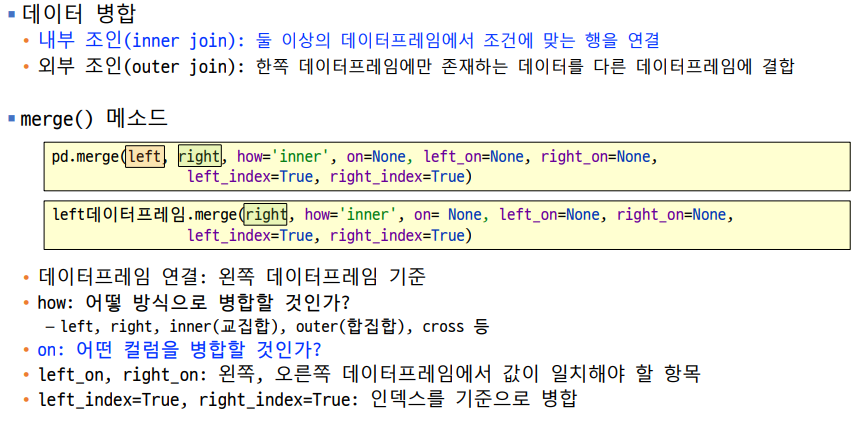

- default로는 inner join

In [ ]:
print('dust, weather 데이터프레임 merge')

merged_df = pd.merge(dust, weather, on='date')
print(merged_df.head)

dust, weather 데이터프레임 merge
<bound method NDFrame.head of             date  year  month  day     so2    co      o3     no2  PM10  PM2.5  \
0     2023-12-01  2023     12    1  0.0029  0.31  0.0296  0.0114  18.0    9.0   
1     2023-12-01  2023     12    1  0.0029  0.31  0.0296  0.0114  18.0    9.0   
2     2023-12-01  2023     12    1  0.0029  0.31  0.0296  0.0114  18.0    9.0   
3     2023-12-01  2023     12    1  0.0029  0.31  0.0296  0.0114  18.0    9.0   
4     2023-12-01  2023     12    1  0.0029  0.31  0.0296  0.0114  18.0    9.0   
...          ...   ...    ...  ...     ...   ...     ...     ...   ...    ...   
17803 2023-12-31  2023     12   31  0.0031  0.86  0.0034  0.0417  33.0   30.0   
17804 2023-12-31  2023     12   31  0.0031  0.86  0.0034  0.0417  33.0   30.0   
17805 2023-12-31  2023     12   31  0.0031  0.86  0.0034  0.0417  33.0   30.0   
17806 2023-12-31  2023     12   31  0.0031  0.86  0.0034  0.0417  33.0   30.0   
17807 2023-12-31  2023     12   31  0.0031  0.86  0.

In [ ]:
merged_df

Output hidden; open in https://colab.research.google.com to view.

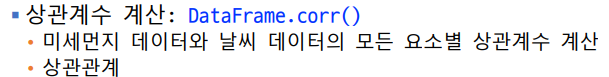

In [ ]:
pd.set_option('display.max_columns',None)   # 전체 컬럼 출력
pd.set_option('display.max_rows',None) # 전체 행 출력

print(merged_df.corr())

              date  year  month       day       so2        co        o3  \
date      1.000000   NaN    NaN  1.000000 -0.310370  0.279067 -0.212558   
year           NaN   NaN    NaN       NaN       NaN       NaN       NaN   
month          NaN   NaN    NaN       NaN       NaN       NaN       NaN   
day       1.000000   NaN    NaN  1.000000 -0.310370  0.279067 -0.212558   
so2      -0.310370   NaN    NaN -0.310370  1.000000  0.489319 -0.131654   
co        0.279067   NaN    NaN  0.279067  0.489319  1.000000 -0.563577   
o3       -0.212558   NaN    NaN -0.212558 -0.131654 -0.563577  1.000000   
no2       0.121090   NaN    NaN  0.121090  0.470415  0.801014 -0.800695   
PM10     -0.063637   NaN    NaN -0.063637  0.602759  0.615911 -0.043040   
PM2.5     0.231274   NaN    NaN  0.231274  0.531579  0.798599 -0.306547   
temp     -0.403202   NaN    NaN -0.403202  0.411110  0.046148  0.101268   
wind     -0.110879   NaN    NaN -0.110879 -0.244332 -0.327946  0.381424   
rain      0.019116   NaN 

In [ ]:
print('미세먼지(PM10)과 상관관계 분석')
corr=merged_df.corr()
print(corr['PM10'].sort_values(ascending=False)) # 내림차순 정렬

미세먼지(PM10)과 상관관계 분석
PM10        1.000000
PM2.5       0.843908
co          0.615911
so2         0.602759
no2         0.455161
temp        0.331628
humidity    0.077039
o3         -0.043040
day        -0.063637
date       -0.063637
wind       -0.119268
rain       -0.219845
year             NaN
month            NaN
Name: PM10, dtype: float64


각 요소별 히스토그램 작성

array([[<Axes: title={'center': 'so2'}>, <Axes: title={'center': 'co'}>,
        <Axes: title={'center': 'o3'}>],
       [<Axes: title={'center': 'no2'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'PM2.5'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>],
       [<Axes: title={'center': 'humidity'}>, <Axes: >, <Axes: >]],
      dtype=object)

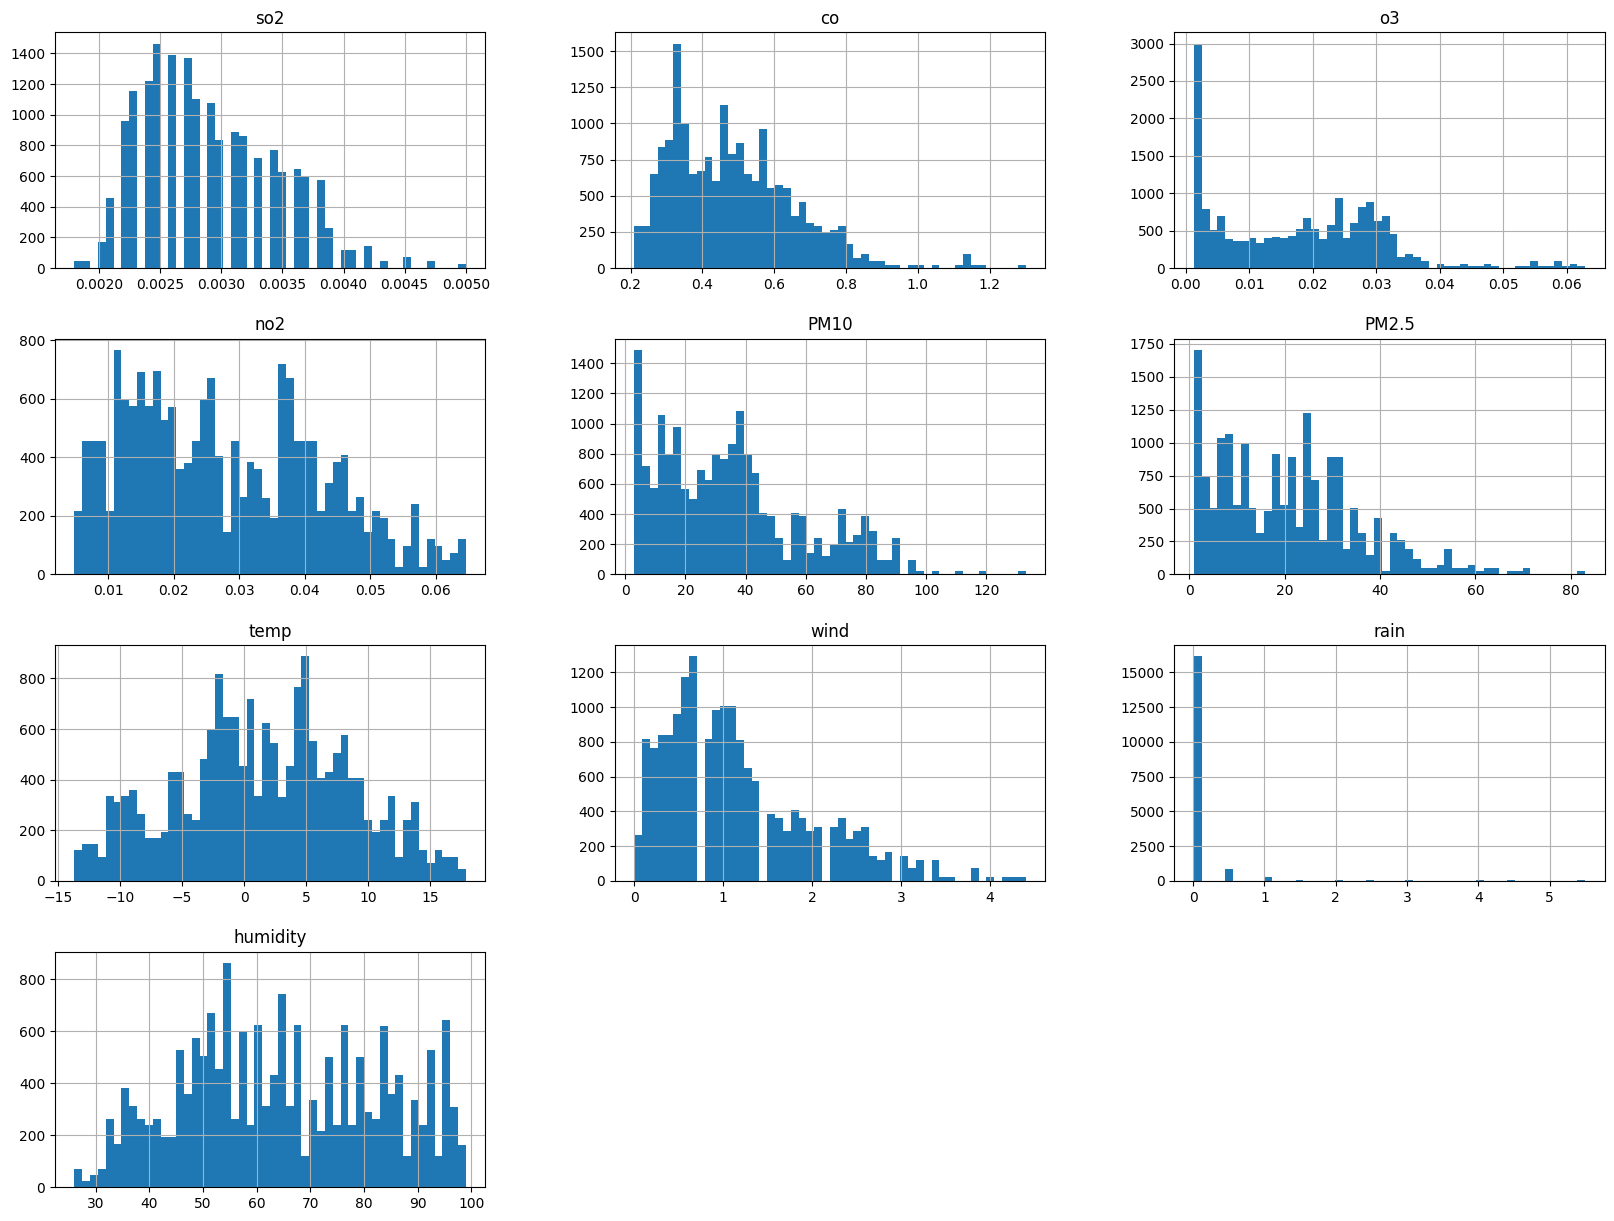

In [ ]:

merged_df.hist(column=['so2','co','o3','no2','PM10','PM2.5','temp','wind','rain','humidity'],bins=50,figsize=(20,15))

날짜별 PM10 농도 막대 그래프

In [ ]:
pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.9 MB/s eta 0:00:00


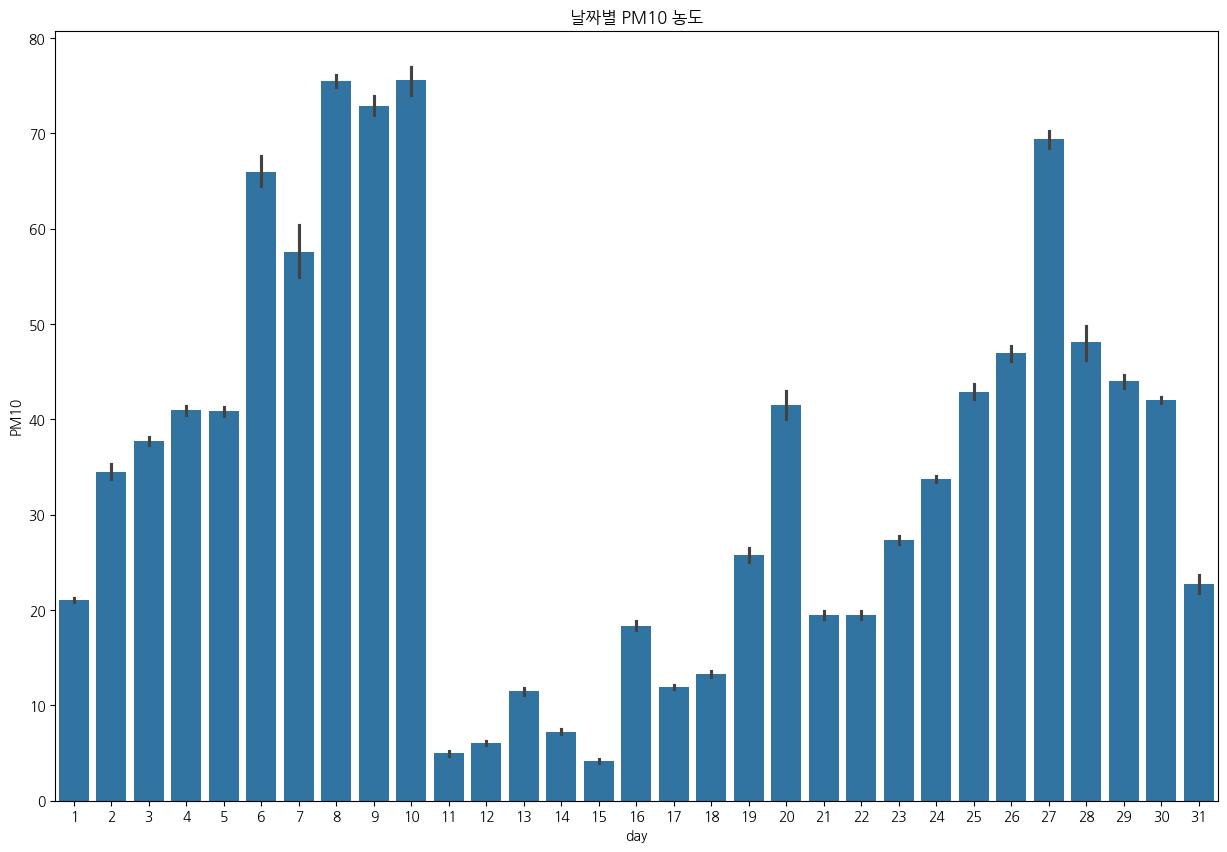

In [ ]:
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
daygraph=sns.barplot(x='day',y='PM10',data=merged_df)
plt.title('날짜별 PM10 농도')
plt.show()

히트맵으로 시각화: 상관계수가 0.3 이상인 항목과의 관계 확인

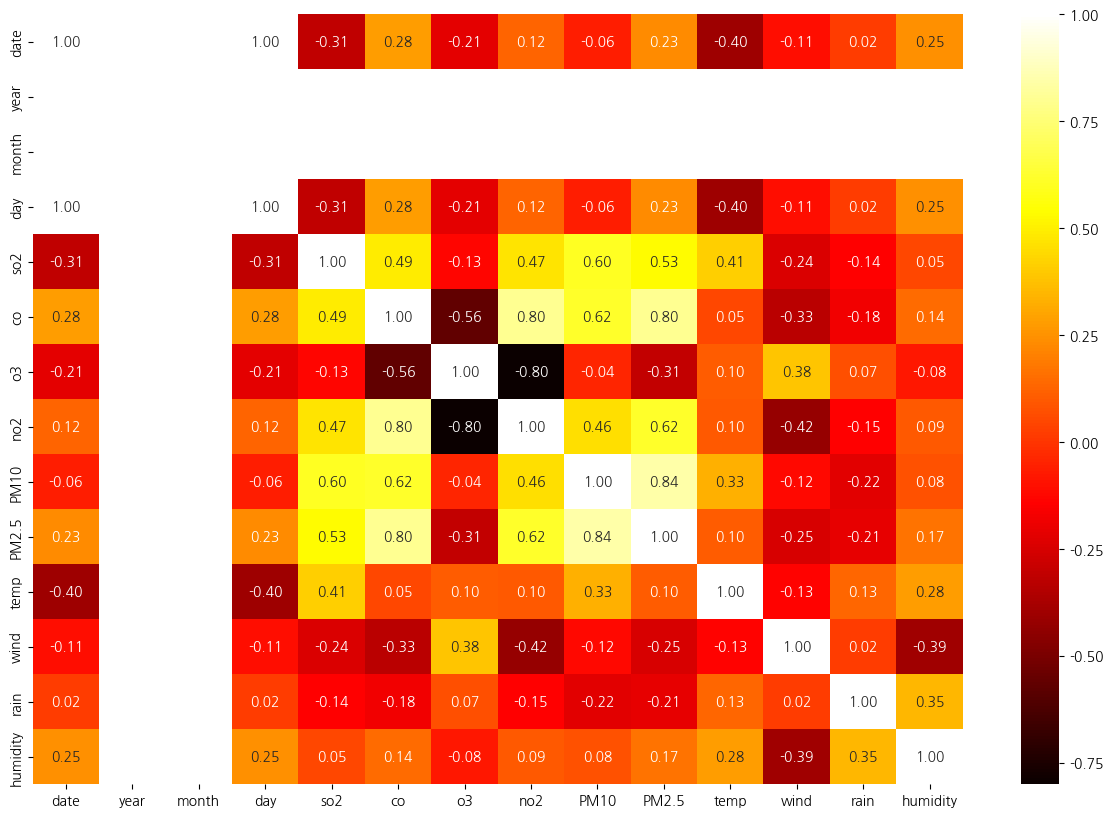

In [ ]:
# annot=True : 칸 별로 상관계수 달아줌
# fmt='.2f' : 소수점 둘째자리까지

plt.figure(figsize=(15,10))
sns.heatmap(data=corr, fmt='.2f', cmap='hot', annot=True) #
plt.show()